In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import random
import numpy
import matplotlib.pyplot as plt
from numpy import transpose
from numpy.random import shuffle
from queue import PriorityQueue
from dataclasses import dataclass, field
from typing import Any

(33, 33)


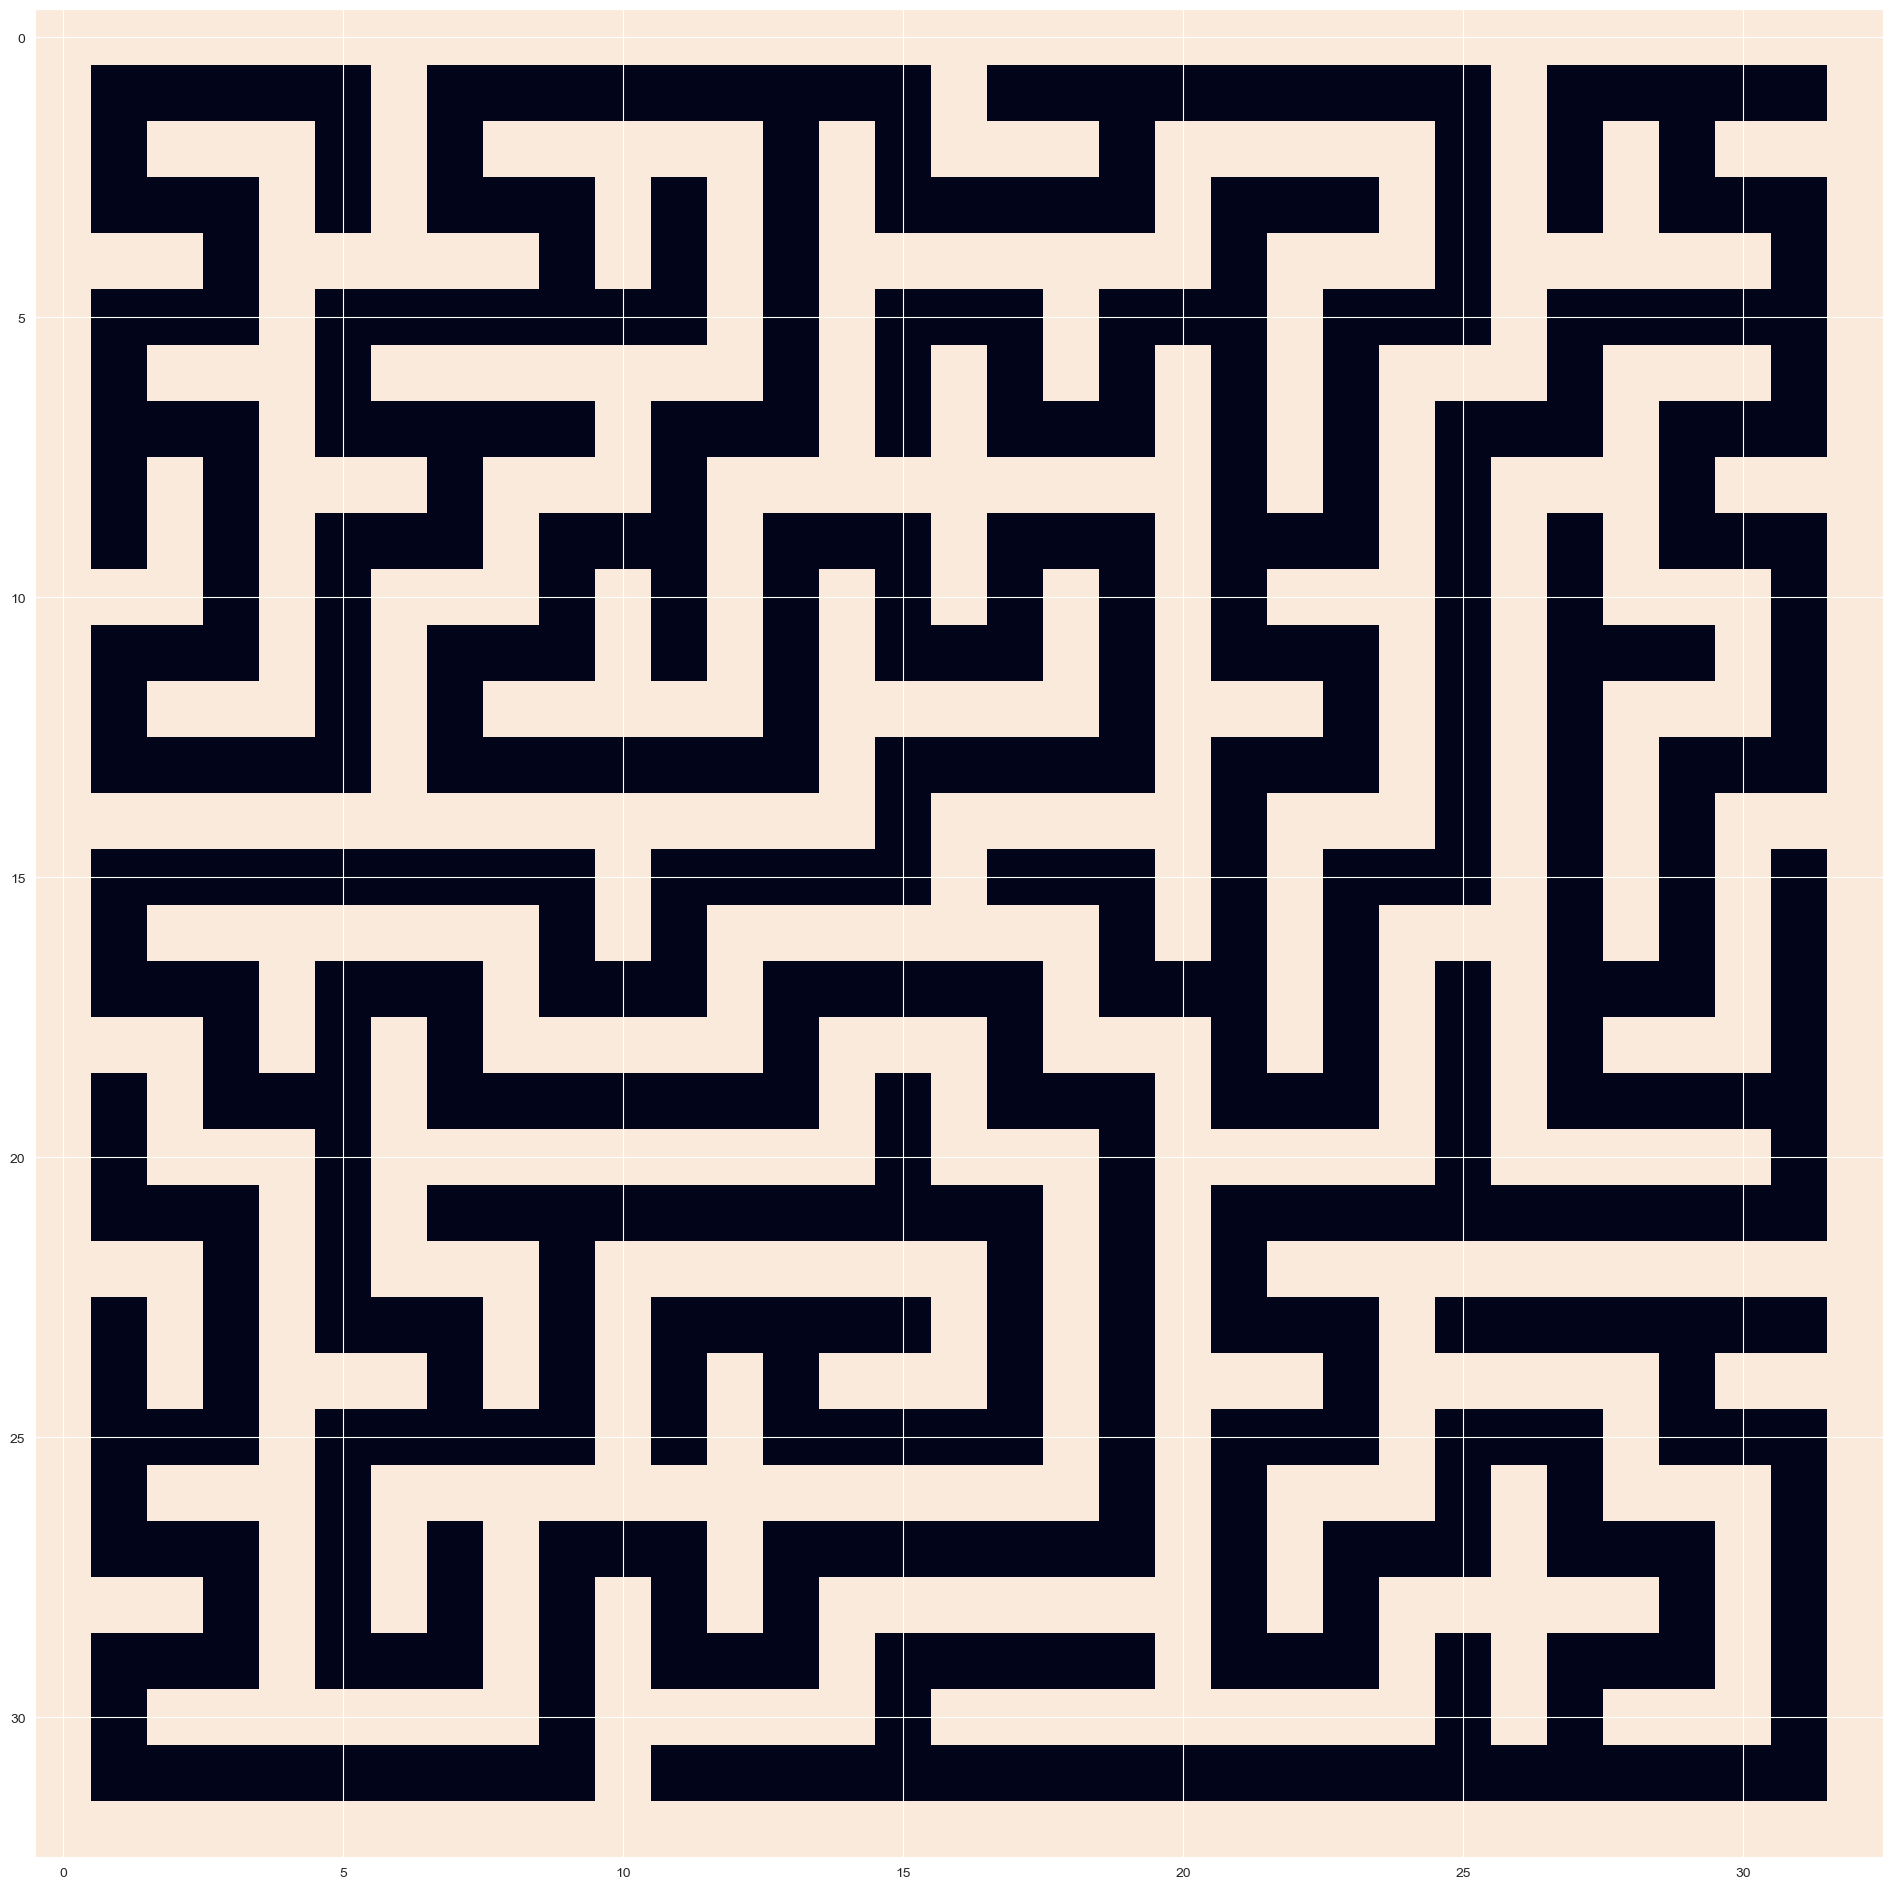

In [4]:
h = 16
w = 16

def make_maze(width, height):
    vis = [[0] * width + [1] for _ in range(height)] + [[1] * (width + 1)]
    ver = [["10"] * width + ['1'] for _ in range(height)] + [[]]
    hor = [["11"] * width + ['1'] for _ in range(height + 1)]

    def walk(step_x, step_y):
        vis[step_y][step_x] = 1

        d = [(step_x - 1, step_y),
             (step_x, step_y + 1),
             (step_x + 1, step_y),
             (step_x, step_y - 1)]
        shuffle(d)
        for (x, y) in d:
            if vis[y][x]: continue
            if x == step_x: hor[max(step_y, y)][x] = "10"
            if y == step_y: ver[y][max(step_x, x)] = "00"
            walk(x, y)

    walk(numpy.random.randint(width), numpy.random.randint(height))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    maze=[]
    for line in s.split("\n"):
        if line != "":
            row=[]
            for instance in line:
                row.append(int(instance))
            maze.append(row)
    return maze

plt.figure(figsize=(24,24))
maze=numpy.array(make_maze(h,w))
plt.imshow(maze)
print(maze.shape)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 1. 0.]]


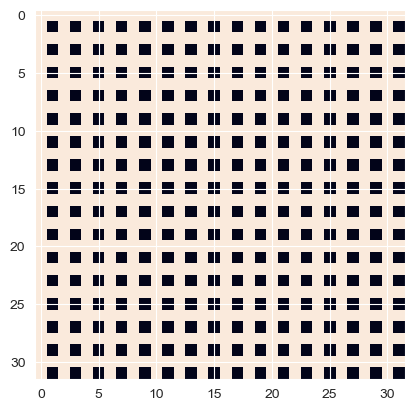

In [5]:
m=numpy.ones((32,32))
for i in range(16):
    for j in range(16):
        m[1+(i*2)][1+(j*2)]=0
plt.imshow(m)
print(m)

In [6]:
def get_valid_neighbours(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for o in range(4):
        nb.append([x+xm[o],y+ym[o]])
    return nb

# Returns a list of neighbours in the order of N,E,S,W
def get_valid_neighbours(maze, location):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for o in range(4):
        if maze[location[0]+xm[o]][location[1]+ym[o]] == 0:
            nb.append([location[0]+xm[o],location[1]+ym[o]])
    return nb


In [7]:
def getRandomTarget():
    x = random.randint(1, w)
    y = random.randint(1, h)
    while maze[x][y] == 1:
        x = random.randint(1, w)
        y = random.randint(1, h)
    print(x,y)
    return [x,y]

startLocation=[1,1]
targetLocation=[h*2-1,w*2-1]
distances = numpy.zeros(maze.shape) - 1
frontier = [startLocation]
distances[startLocation[0]][startLocation[1]] = 0
currentDistance = 1

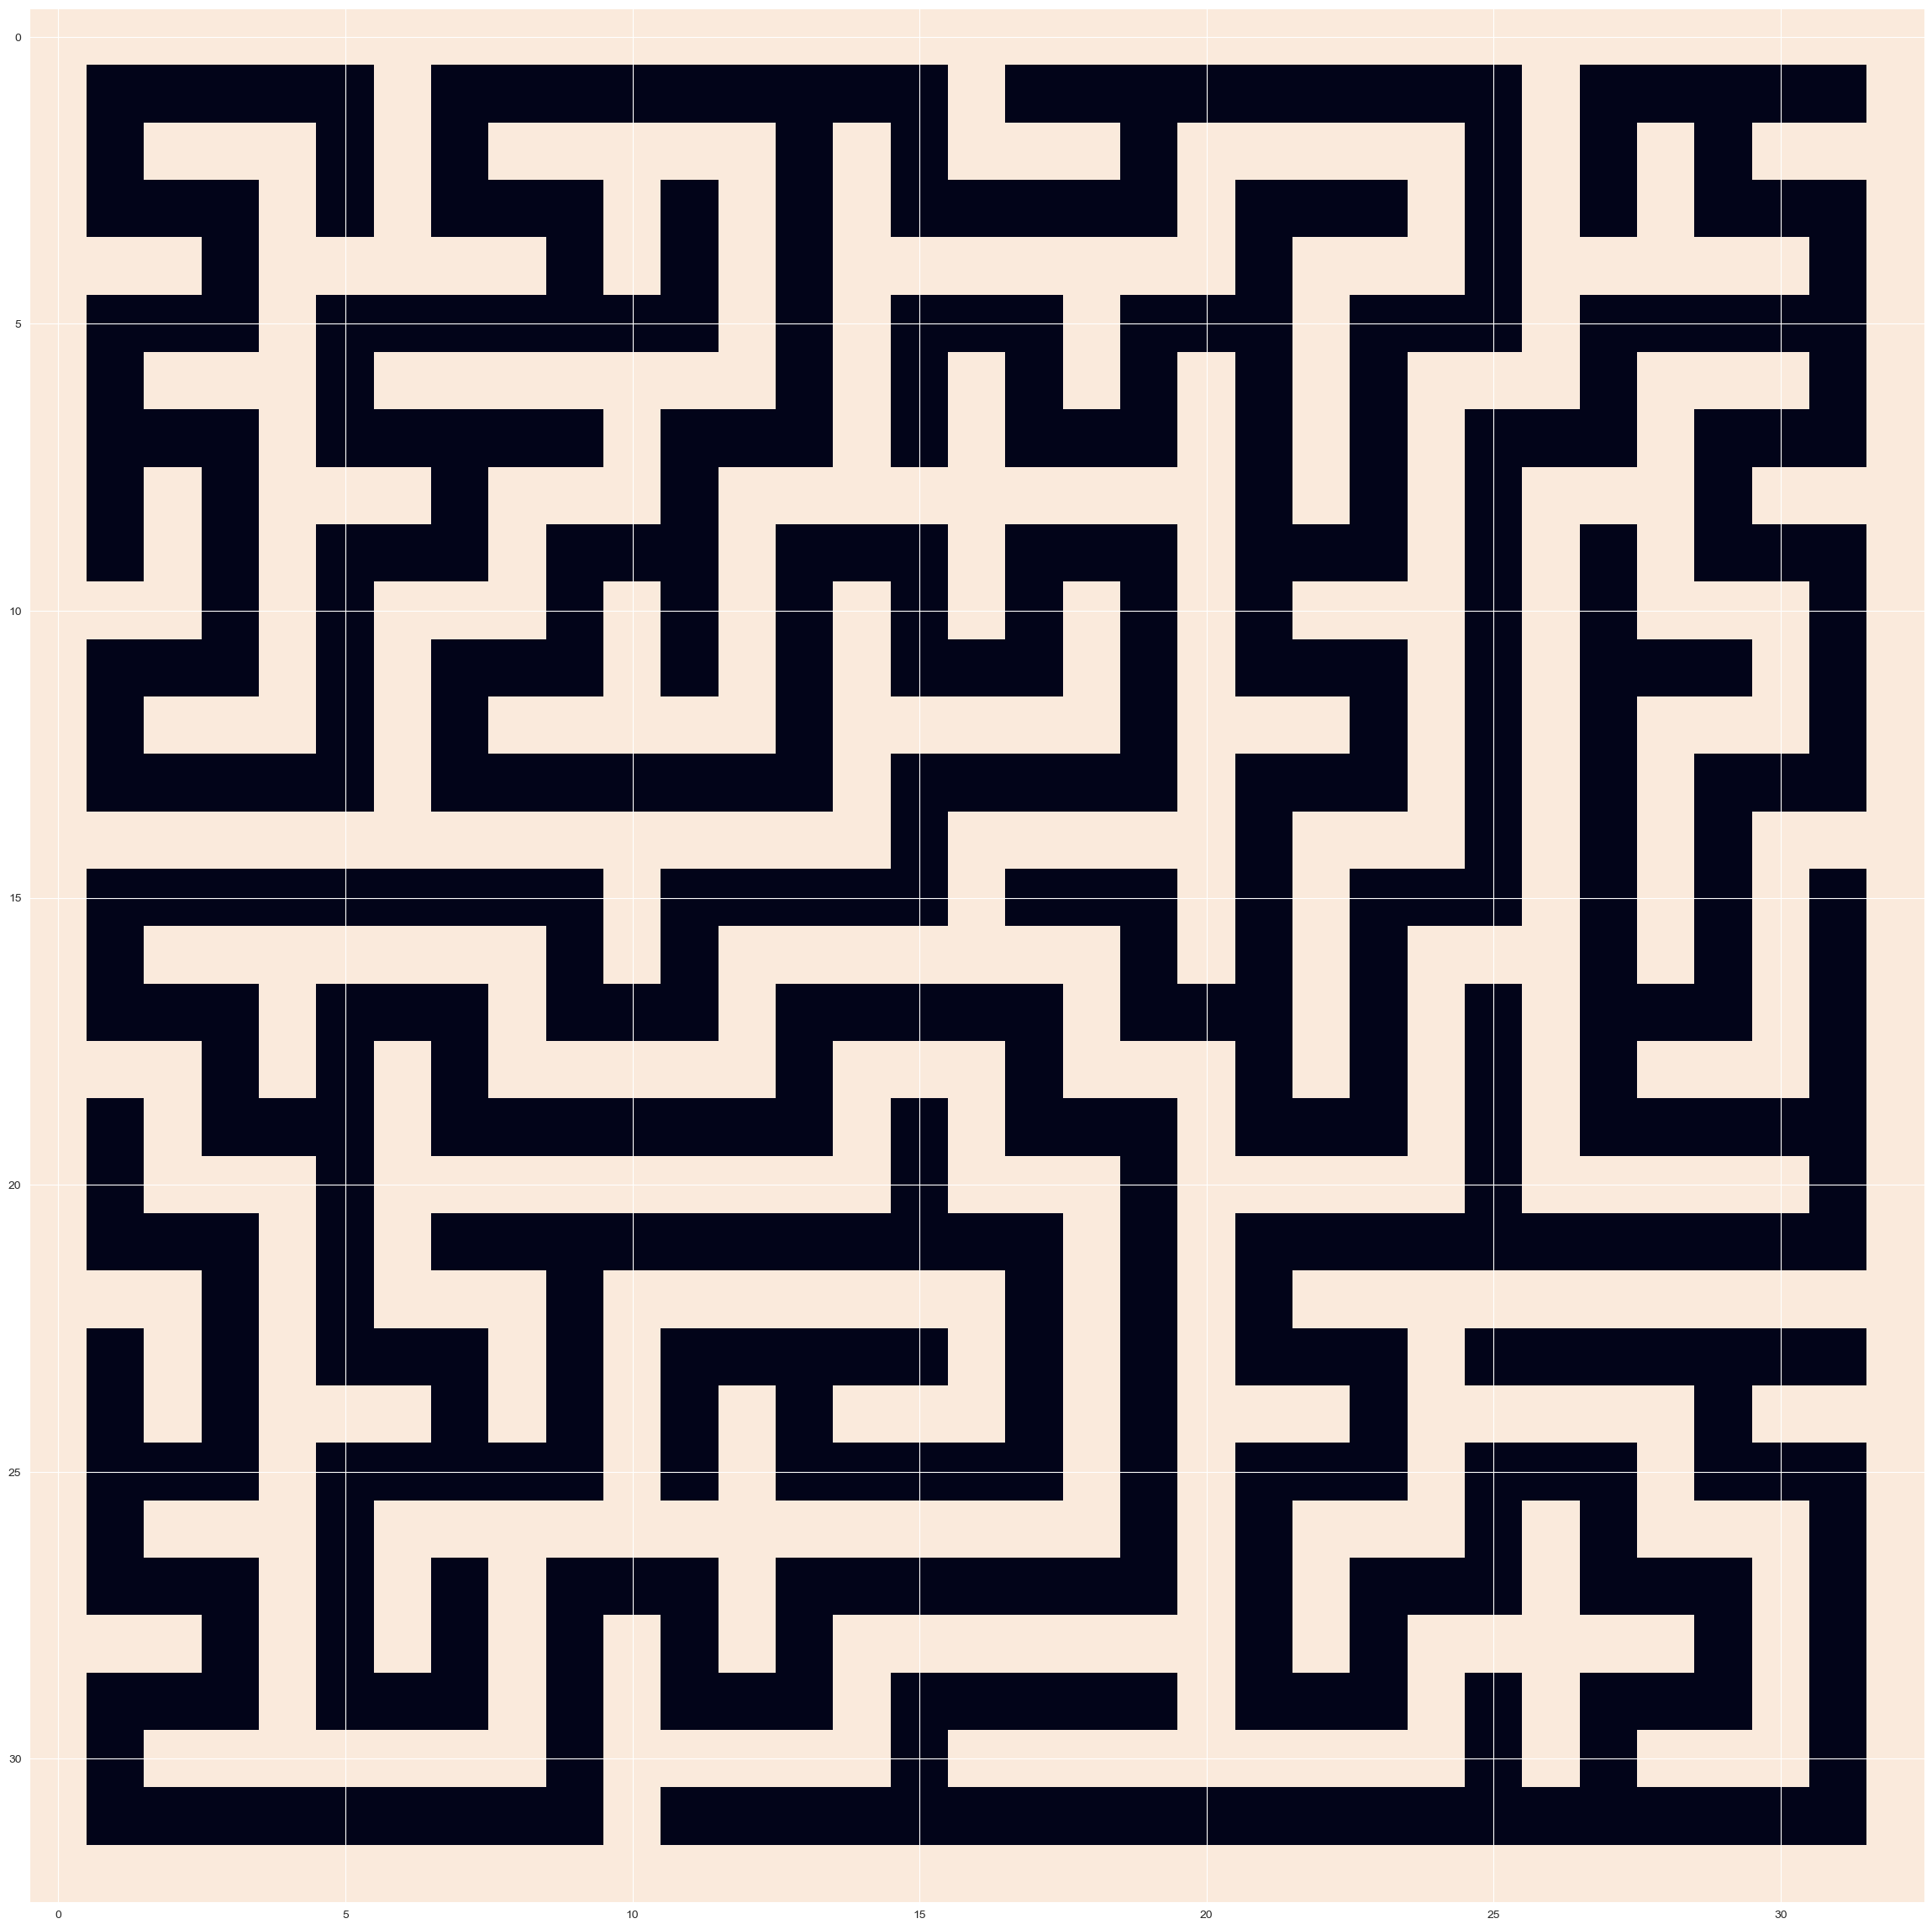

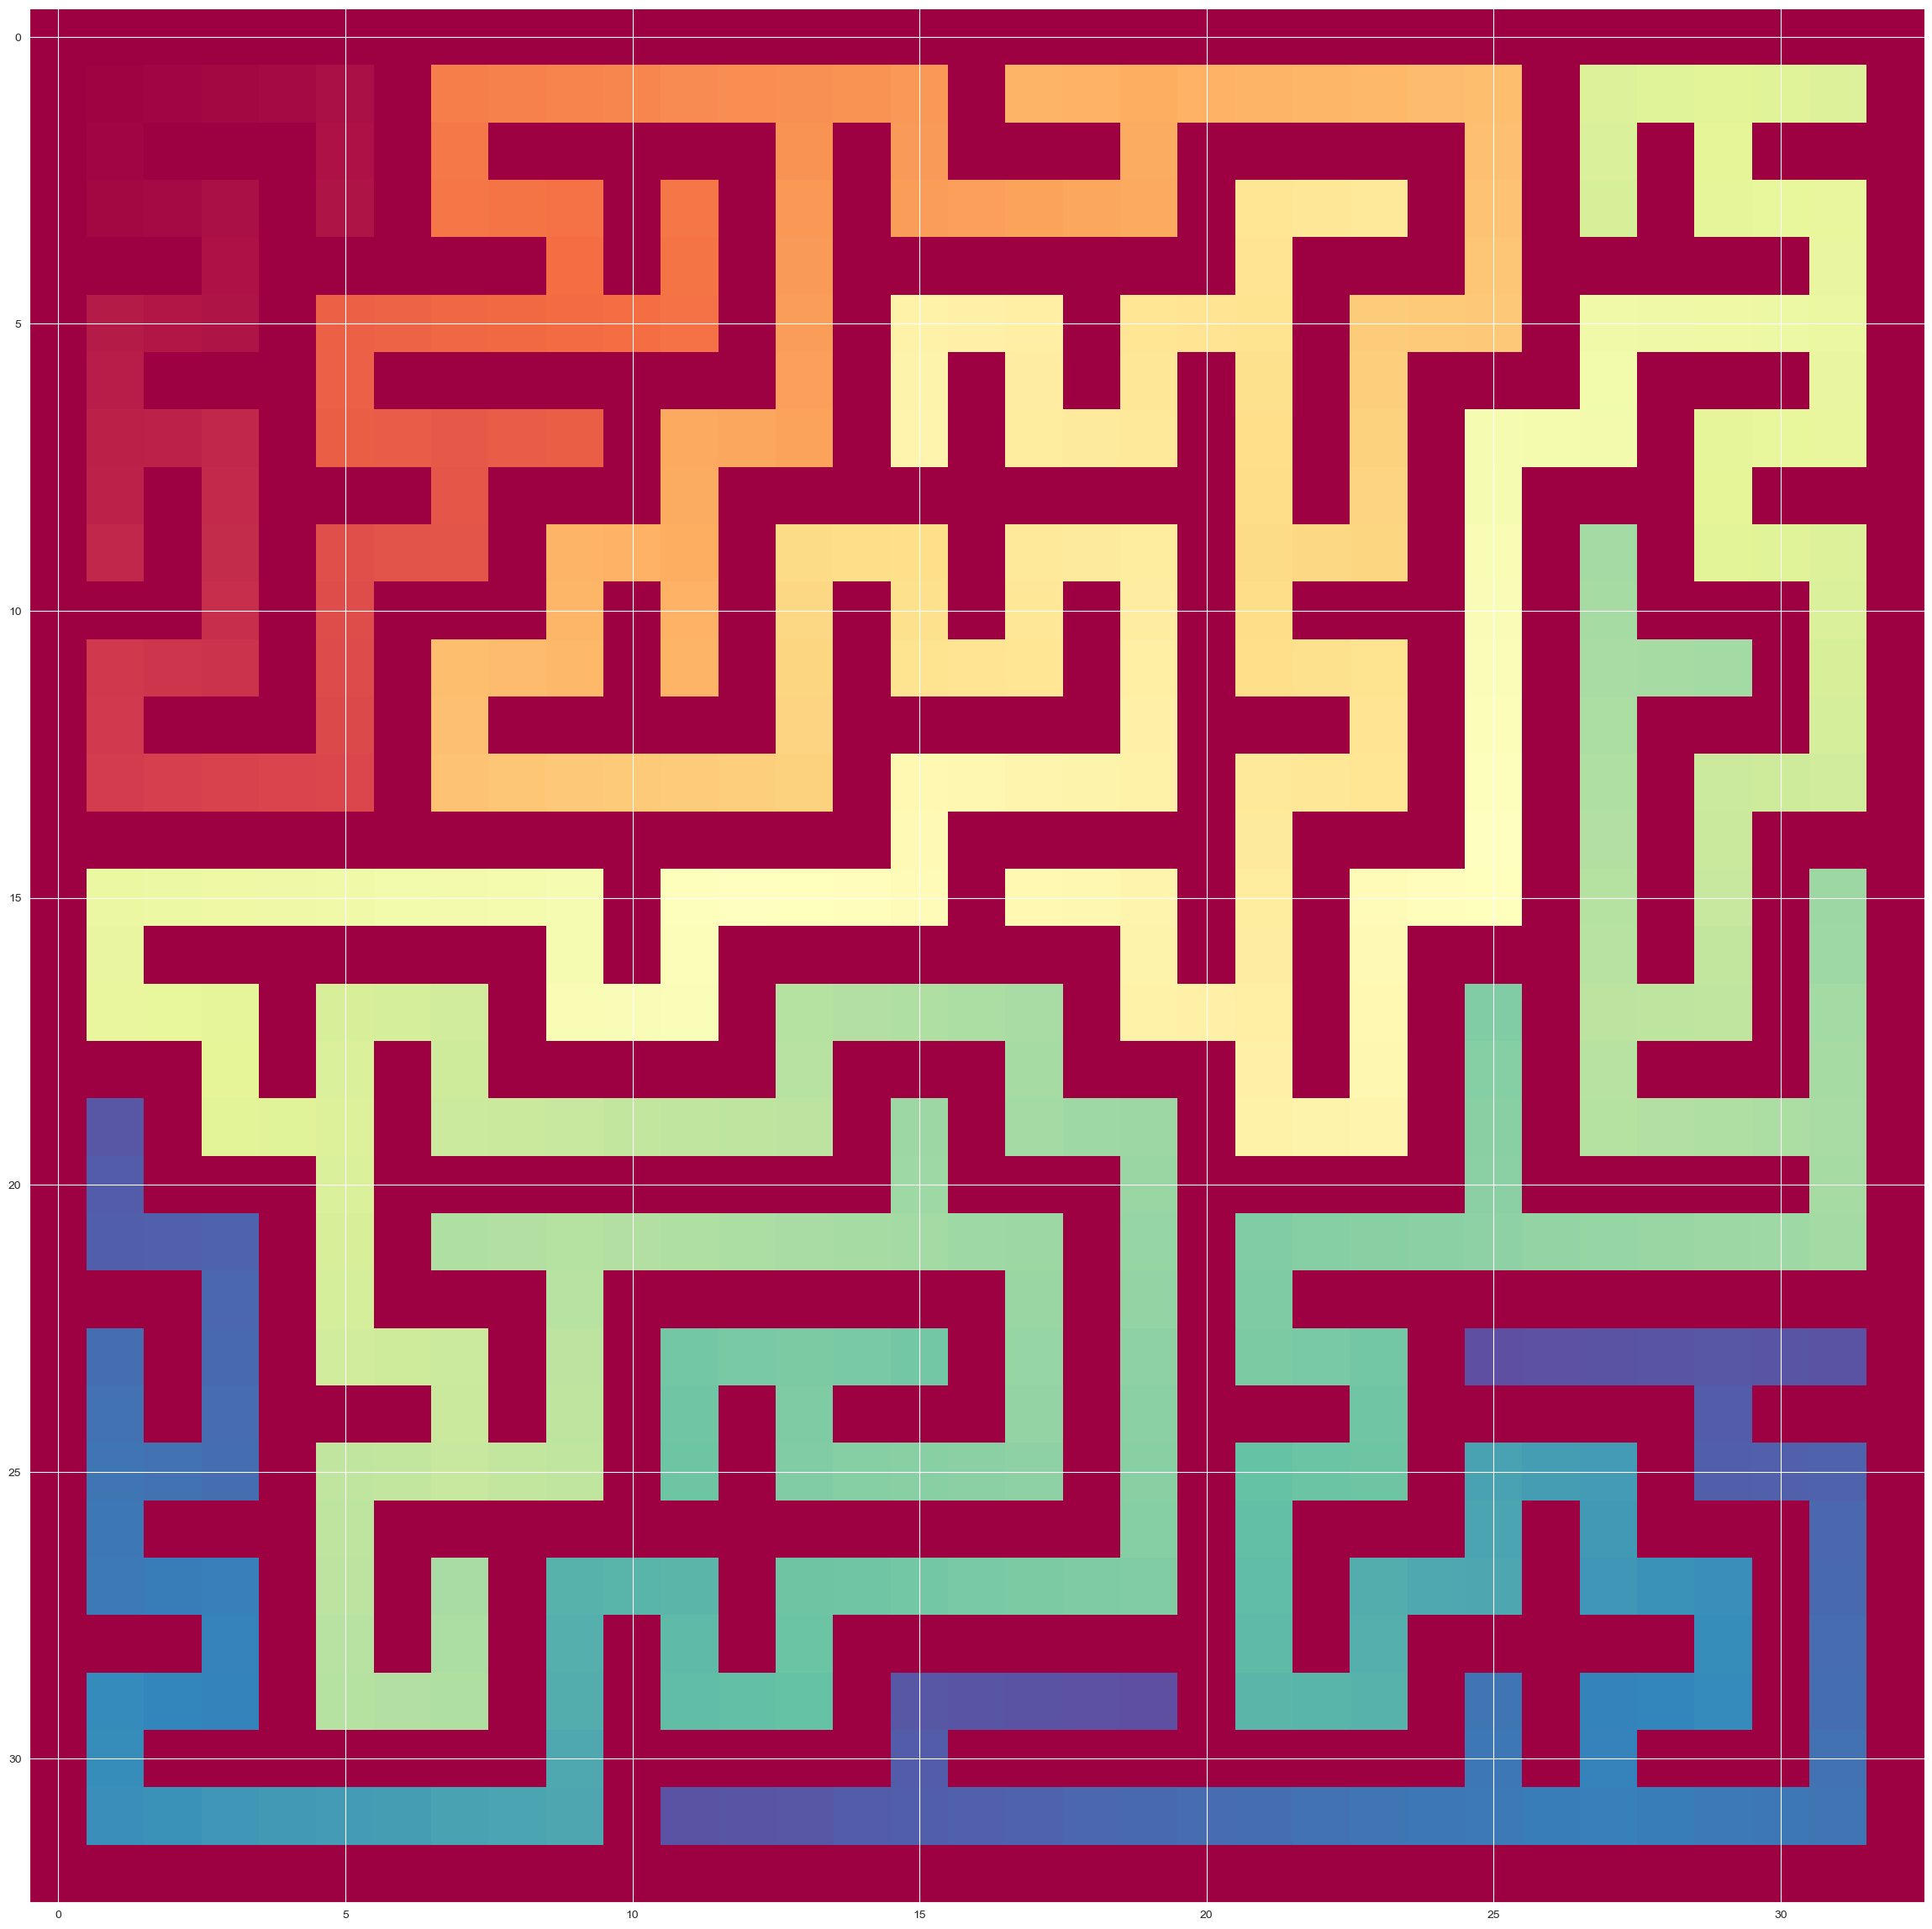

In [8]:
while len(frontier) > 0:
    newFrontier = list()
    for curr in frontier:
        neighbours = get_valid_neighbours(maze, curr)
        for neighbour in neighbours:
            if maze[neighbour[0]][neighbour[1]] == 0 and distances[neighbour[0]][neighbour[1]] < 0.0:
                distances[neighbour[0]][neighbour[1]] = currentDistance
                newFrontier.append(neighbour)
    frontier = newFrontier
    currentDistance += 1

plt.figure(figsize=[64,32])
plt.subplot(1,2,1)
plt.imshow(maze)
plt.figure(figsize=[64,32])
plt.subplot(1,2,2)
plt.imshow(distances, cmap='Spectral')

In [9]:
@dataclass(order = True)
class PrioritizedItem:
    priority: int
    item: Any=field(compare = False)
    steps: int=field(compare = False)

    def get_item(self):
        return self.item

    def get_walked(self):
        return self.steps

def heuristic(walked, startNode, endNode):
    x1, y1 = startNode
    x2, y2 = endNode
    return walked + (abs(x1 - x2) + abs(y1 - y2))

def AS(maze, startNode, endNode):
    # Sets up the 'front' (frontier) PriorityQueue().
    front = PriorityQueue()
    # Adds the starting position into the frontier.
    front.put(PrioritizedItem(heuristic(0, startNode, endNode), startNode, 0))
    # Sets up the 'explored' List for storing visited nodes.
    exp = list()
    # If the frontier isn't empty then loop.
    while front.qsize() != 0:
        # Pop the lowest-value (the highest priority) Item from the Queue.
        cc = front.get()
        # If the 'item' (Coords-Array) in the PrioritizedItem is in the 'explored' list.
        if cc.get_item() in exp:
            #   - Then skip this loop, this avoids a deadlock due to rolling between the same cells.
            continue
        # If the 'item' (Coords-Array) in the PrioritizedItem is the end-node.
        if cc.get_item() == endNode:
            #   - Then print that it was successfully found alongside the explored array and the endNode.
            return "Successful!", exp + [endNode]
        # Loop ForEach valid neighbour (Valid is if the array value is 0).
        for nb in get_valid_neighbours(maze, cc.get_item()):
            # Double-Check that the neighbour Coordinates are in-fact of integer value 0.
            if maze[nb[0]][nb[1]] == 0:
                # If it is then add the neighbour to the frontier.
                front.put(PrioritizedItem(heuristic(cc.get_walked(), nb, endNode), nb, cc.get_walked() + 1))
        # Then append the coordinates of this cell to the 'explored' list.
        exp.append(cc.get_item())
    # Error if failed.
    return "Failure!", exp

Starting Location:  [1, 1]
Target Location:  [31, 31]
--------------------------------------
Answer:  Successful!
Explored:  [[1, 1], [1, 2], [2, 1], [1, 3], [3, 1], [1, 4], [3, 2], [1, 5], [3, 3], [2, 5], [4, 3], [3, 5], [5, 3], [5, 2], [5, 1], [6, 1], [7, 1], [7, 2], [8, 1], [7, 3], [9, 1], [8, 3], [9, 3], [10, 3], [11, 3], [11, 2], [11, 1], [12, 1], [13, 1], [13, 2], [13, 3], [13, 4], [13, 5], [12, 5], [11, 5], [10, 5], [9, 5], [9, 6], [9, 7], [8, 7], [7, 7], [7, 8], [7, 9], [7, 6], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [4, 9], [4, 11], [3, 11], [3, 9], [3, 8], [3, 7], [2, 7], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [2, 13], [1, 15], [3, 13], [2, 15], [4, 13], [3, 15], [5, 13], [3, 16], [6, 13], [3, 17], [7, 13], [3, 18], [3, 19], [2, 19], [7, 12], [7, 11], [1, 19], [1, 20], [8, 11], [1, 21], [9, 11], [1, 22], [10, 11], [1, 23], [11, 11], [1, 24], [1, 25], [2, 25], [3, 25], [4, 25], [5, 25], [5, 24], [1, 18], [9, 10], 

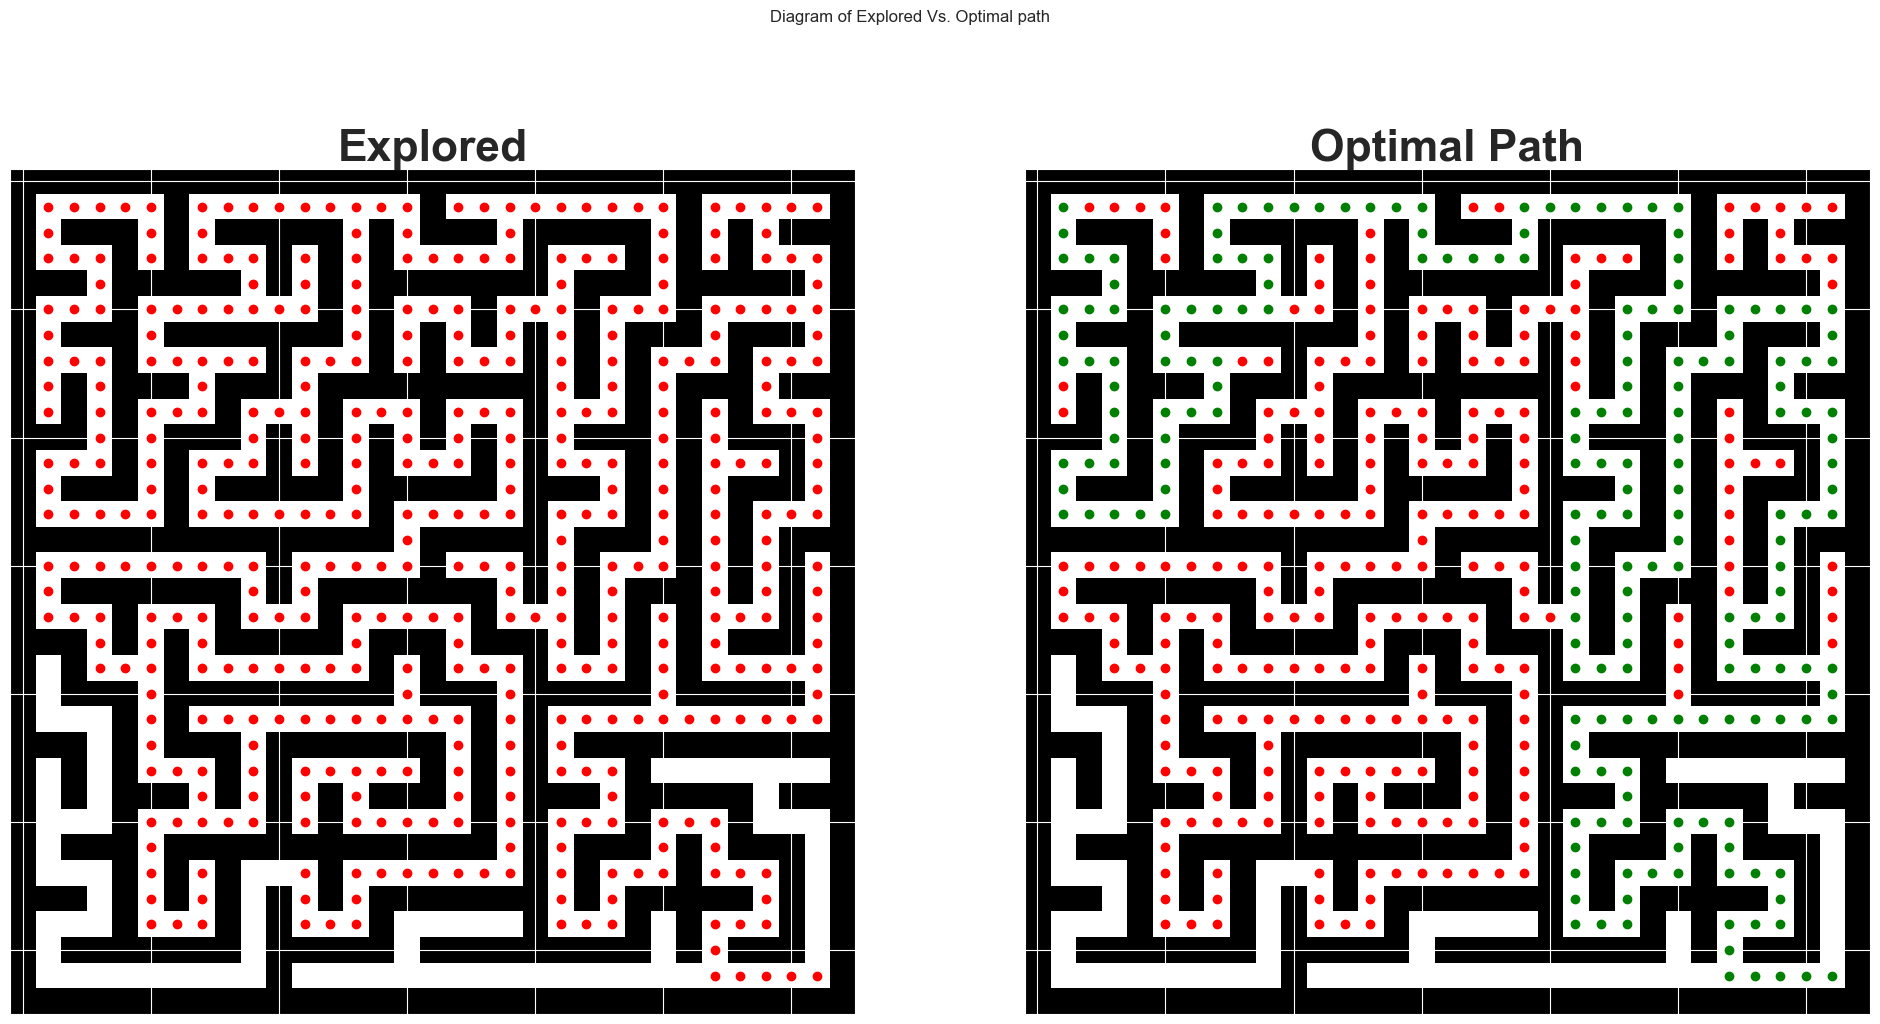

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))

fig.suptitle('Diagram of Explored Vs. Optimal path')

ax1.set_title('Explored', fontdict={'fontsize': 32, 'fontweight': 'heavy'})
ax1.tick_params(
    labelbottom=False, bottom=False,
    labelleft=False, left=False,
)

ax2.set_title('Optimal Path', fontdict={'fontsize': 32, 'fontweight': 'heavy'})
ax2.tick_params(
    labelbottom=False, bottom=False,
    labelleft=False, left=False,
)

print('Starting Location: ', startLocation)
print('Target Location: ', targetLocation)
print('--------------------------------------')
answer, exp = AS(maze, startLocation, targetLocation)
print('Answer: ', answer)
print('Explored: ', exp)

ax1.imshow(maze, cmap='Greys')
ax1.plot(transpose(exp)[1], transpose(exp)[0], 'or')
print('--------------------------------------')

currentLocation = targetLocation
path=[]
while currentLocation != startLocation:
    path.append(currentLocation)
    neighbours = get_valid_neighbours(maze, currentLocation)
    indices = []
    for nb in neighbours:
        if nb in exp:
            indices.append(exp.index(nb))
    currentLocation = exp[min(indices)]
path.append(startLocation)
print('Optimal Path: ', path)
ax2.imshow(maze, cmap='Greys')
deadends = []
for pos in exp:
    if pos not in path:
        deadends.append(pos)
ax2.plot(transpose(deadends)[1], transpose(deadends)[0], 'or')
ax2.plot(transpose(path)[1], transpose(path)[0], 'og')